### Homework 3.6 - Voice Changer

We will try to make a simple voice changer by manipulating the frequency domain.

In this problem, you will have to make a short vocal record of about 10-15 seconds (no noise). Play around with the frequency domain to change the pitch of the audio and then invert it back to time domain in order to test the new voice. Make at least 2 new different voices.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**


### Reading WAV file

Since left is louder than right, will be equalizing both sides by using left's sound

In [1]:
from scipy.io import wavfile
import numpy as np

freq, y = wavfile.read('audio/PokemonUnite_15s.wav')

freq, y

wavfile.write('audio/PokemonUnite_15s_Left.wav', freq, np.array(y[:, 0], dtype=np.int16))
wavfile.write('audio/PokemonUnite_15s_Right.wav', freq, np.array(y[:, 1], dtype=np.int16))

y = y[:, 0]

### Creating the time domain from the frequency

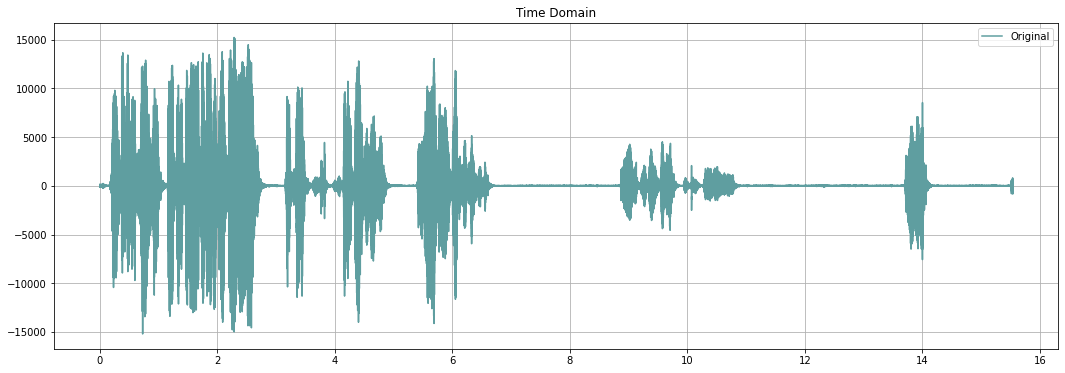

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

dt = 1/freq
t = np.linspace(0, (len(y)-1)*dt, len(y))
plt.figure(figsize=(18,6))
plt.plot(t, y, label='Original', color='cadetblue')
plt.title('Time Domain')
plt.grid()
plt.legend()

### Convert the time domain to frquency domain

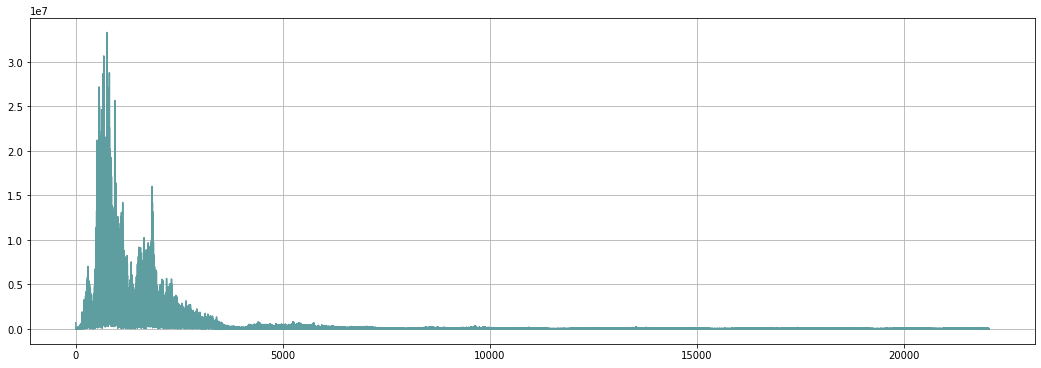

In [3]:
from scipy.fft import rfft, rfftfreq

y_freq = rfft(y)
x_freq = rfftfreq(len(t),dt)

plt.figure(figsize=(18,6))

plt.plot(x_freq, np.abs(y_freq), color='cadetblue')
plt.grid()

### Change Frequency

#### Method 1: 
Multiply the frequency value when writing to audio file

In [4]:
# higher frequency = higher pitch
wavfile.write('audio/hw36-voice-changer-1.wav', int(1.22*freq), np.array(y, dtype=np.int16))

# lower frequency = lower pitch
wavfile.write('audio/hw36-voice-changer-2.wav', int(0.82*freq), np.array(y, dtype=np.int16))

This method affects the duration of the audio as well (lower frequency - slows down the video so the duration is longer, and vice versa)

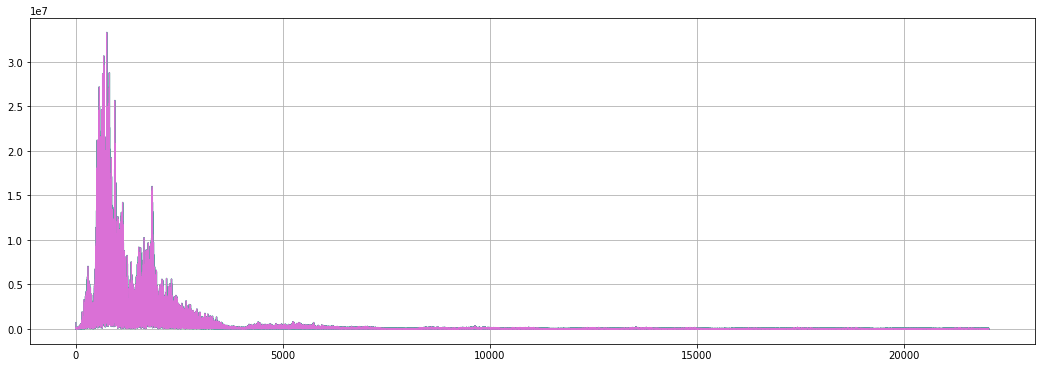

In [5]:
freq_v1, y_v1 = wavfile.read('audio/PokemonUnite_15s.wav')

y == y_v1[:, 0]

y_freq_v1 = rfft(y)
x_freq_v1 = rfftfreq(len(t),dt)

plt.figure(figsize=(18,6))

plt.plot(x_freq, np.abs(y_freq), color='cadetblue')

plt.plot(x_freq_v1, np.abs(y_freq_v1), color='orchid', lw=0.7)
plt.grid()

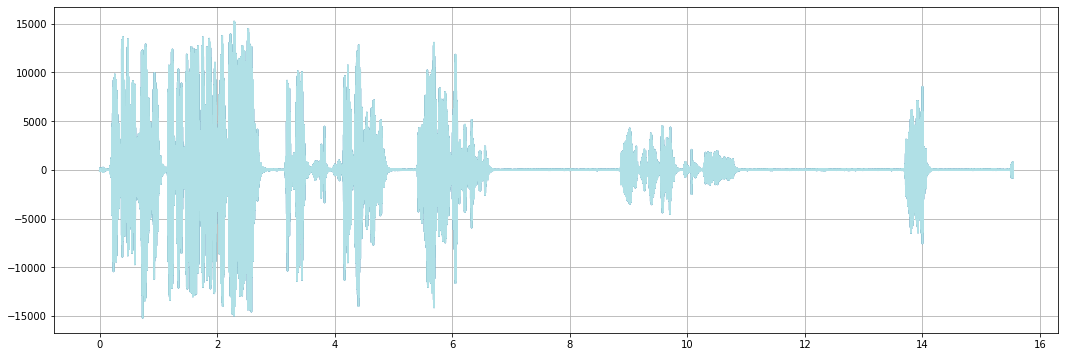

In [6]:
from scipy.fft import irfft

reverted_y = irfft(y_freq)
reverted_y_v1 = irfft(y_freq_v1)
plt.figure(figsize=(18,6))
plt.plot(t, y, label='Original', color='cornflowerblue')
plt.plot(t, reverted_y, label='Reverted', color='cadetblue')
plt.plot(t, reverted_y_v1, label='Reverted New', color='powderblue')

abs(reverted_y - y) <= 1e-10, abs(reverted_y_v1 - y) <= 1e-10, reverted_y_v1 == reverted_y
# plt.plot(t, cleaned_y_left, label='Cleaned Left Ear', color='cadetblue', lw=0.7)
plt.grid()

#### Method 2: 

Using `np.roll` to change pitch

make the rolled values from 0-highest rolled frequency to zero, because we don't want the values to roll over from the end

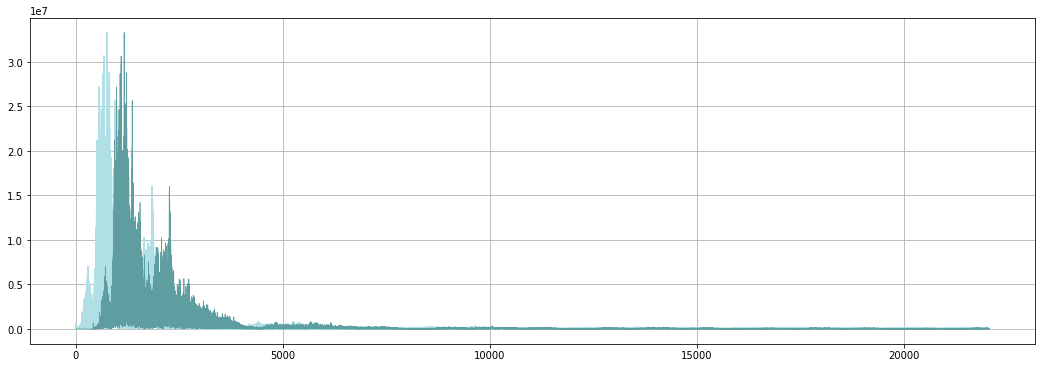

In [24]:
rolled_y_freq = np.roll(y_freq, 6500)
rolled_y_freq[0:6500] = 0

plt.figure(figsize=(18,6))

plt.plot(x_freq, np.abs(y_freq), color='powderblue')

plt.plot(x_freq, np.abs(rolled_y_freq), color='cadetblue', lw=0.7)
plt.grid()

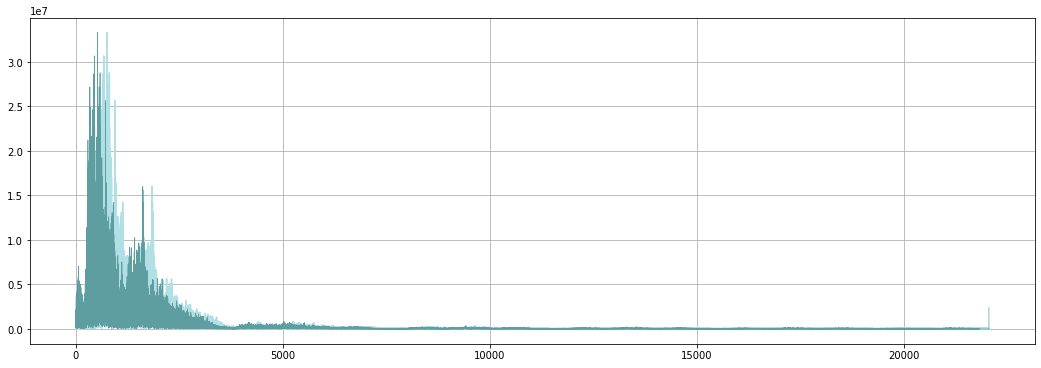

In [44]:
reverse_rolled_y_freq = np.roll(y_freq, -3500)
reverse_rolled_y_freq[-3501:-1] = 0

plt.figure(figsize=(18,6))

plt.plot(x_freq, np.abs(y_freq), color='powderblue')

plt.plot(x_freq, np.abs(reverse_rolled_y_freq), color='cadetblue', lw=0.7)
plt.grid()

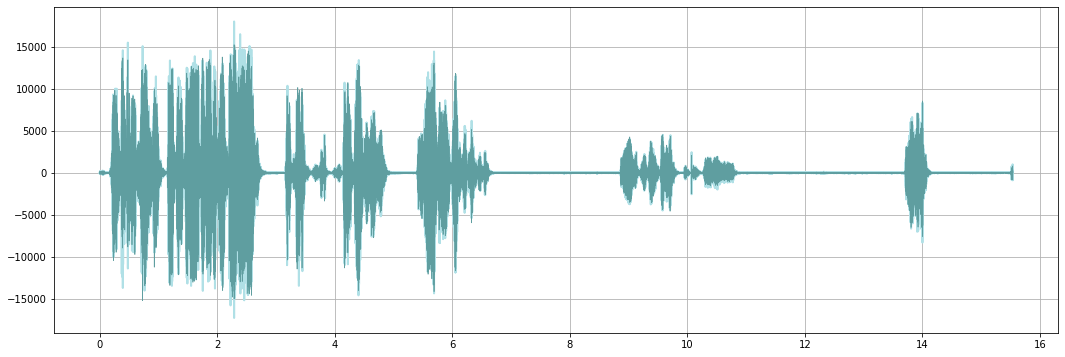

In [45]:
reverted_rolled_y = irfft(rolled_y_freq)
plt.figure(figsize=(18,6))
plt.plot(t, reverted_rolled_y, label='Reverted', color='powderblue', lw=2)
plt.plot(t, y, label='Original', color='cadetblue', lw=0.7)
plt.grid()

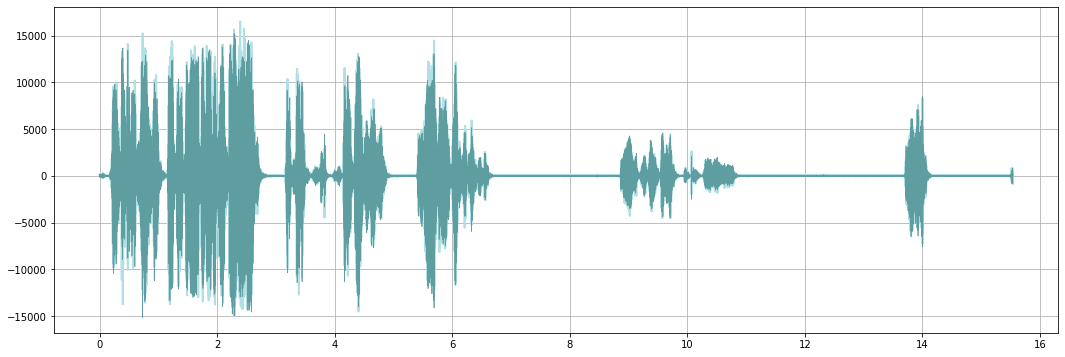

In [46]:
reverted_reverse_rolled_y = irfft(reverse_rolled_y_freq)
plt.figure(figsize=(18,6))
plt.plot(t, reverted_reverse_rolled_y, label='Reverted', color='powderblue', lw=2)
plt.plot(t, y, label='Original', color='cadetblue', lw=0.7)
plt.grid()

In [47]:
wavfile.write('audio/hw36-voice-changer-3.wav', freq, np.array(reverted_rolled_y, dtype=np.int16))
wavfile.write('audio/hw36-voice-changer-4.wav', freq, np.array(reverted_reverse_rolled_y, dtype=np.int16))